<a href="https://colab.research.google.com/github/jasmeen2105/Crop_Recommendation_System/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import zipfile

# Unzip the file
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/archive/') # Extract to a new directory

# Update data_path to the extracted directory
data_path = '/content/archive'


In [ ]:
df = pd.read_csv('/content/archive/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.shape

(2200, 8)

In [ ]:
x = df.drop(columns = ['label'])
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
y=df['label']
y.head()

,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [ ]:
#for Statistical analysis
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


<Axes: >

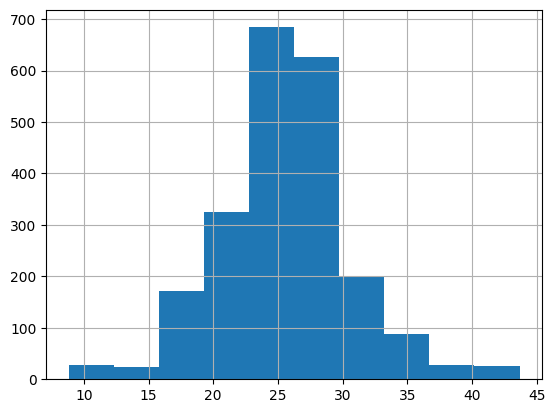

In [ ]:
df['temperature'].hist()

In [ ]:
x.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [ ]:
#Split Features and Target Variable
x = df[['N', 'P','K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

In [ ]:
#Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Train Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate Model Performance
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


In [ ]:
# Save the Trained Model
with open("crop_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [ ]:
print("Model trained and saved as 'crop_model.pkl'!")

Model trained and saved as 'crop_model.pkl'!


In [ ]:
# Import Required Libraries
import pickle
import numpy as np

In [ ]:
# Load Trained Model
with open("crop_model.pkl", "rb") as file:
    model = pickle.load(file)

In [ ]:
# Take User Input
N = float(input("Enter Nitrogen value: "))
P = float(input("Enter Phosphorus value: "))
K = float(input("Enter Potassium value: "))
Temperature = float(input("Enter Temperature (°C): "))
Humidity = float(input("Enter Humidity (%): "))
pH = float(input("Enter pH value: "))
Rainfall = float(input("Enter Rainfall (mm): "))


Enter Nitrogen value: 45
Enter Phosphorus value: 34
Enter Potassium value: 25
Enter Temperature (°C): 39
Enter Humidity (%): 58
Enter pH value: 4.7
Enter Rainfall (mm): 167


In [ ]:
# Make Prediction
input_features = np.array([[N, P, K, Temperature, Humidity, pH, Rainfall]])
predicted_crop = model.predict(input_features)[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Display Prediction
print(f"\nRecommended Crop: {predicted_crop}")


Recommended Crop: mango
